# Isolation Forest - preprocessing

In [1]:
from pathlib import Path
import os

os.chdir(Path(os.getcwd()).parent)

In [2]:
from AnomalyCableDetection.load import Loader, Preprocessor
from AnomalyCableDetection.stl import CableSTL, CrossCorrelation, AdjacencyType
from AnomalyCableDetection.plot import *

In [3]:
from sklearn.ensemble import IsolationForest
from os.path import join
from pathlib import Path

import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
import re

### Load pre1 dataset

In [4]:
pre1_path = join(Path(os.getcwd()), 'data', 'csv', 'preprocessed_1')
pre1_list = glob.glob(join(pre1_path, '*.csv'))
date_regex = r'(19|20)\d{2}-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[0-1])'
date_list = []
cable_dict = dict()

for pre1 in pre1_list:
    m = re.search(date_regex, pre1)
    date = m.group(0)
    date_list.append(date)
    cable_df = pd.read_csv(pre1, index_col=0)
    cable_dict.update({date: cable_df})

date_list.sort()
cable_list = cable_dict[date_list[0]].columns.tolist()
cable_list.remove('SJS13')
cable_list.remove('SJX08')
cable_list.remove('SJX13')

for date in date_list:
    df = cable_dict[date].loc[:, cable_list]
    cable_dict.update({date: df})

### Plot tension_df

In [5]:
def get_dup_cable_numbers(tension_df):
    cable_list = tension_df.columns.to_list()
    cable_numbers = []

    for cable in cable_list:
        cable_number = int(cable[-2:])
        cable_numbers.append(cable_number)

    cable_numbers = [x for i, x in enumerate(cable_numbers) if i != cable_numbers.index(x)]
    return cable_numbers

def get_scatter_df(tension_df, start=0, end=100):
    cable_numbers = get_dup_cable_numbers(tension_df)
    
    single_len = end - start
    index_len = single_len * len(cable_numbers)
    
    scatter_df = pd.DataFrame(index=[i for i in range(index_len)], columns=['x', 'y', 'cable'])
    for i, cable in enumerate(cable_numbers):
        cable_number = str(cable).zfill(2)
        x = tension_df.loc[start:end - 1, f'SJS{cable_number}'].to_list()
        y = tension_df.loc[start:end - 1, f'SJX{cable_number}'].to_list()
        scatter_df.loc[i * single_len:(i + 1) * single_len - 1, 'x'] = x
        scatter_df.loc[i * single_len:(i + 1) * single_len - 1, 'y'] = y
        scatter_df.loc[i * single_len:(i + 1) * single_len, 'cable'] = f'SJ{cable_number}'
        
    return scatter_df

def scatter_up_down(tension_df, title='', start=0, end=100,
                    figsize=(10, 10), s=3):
    scatter_df = get_scatter_df(tension_df, start, end)
    min_value = 5 * (np.amin(tension_df.to_numpy()) // 5)
    max_value = 5 * ((np.amax(tension_df.to_numpy()) // 5) + 1)
    
    color_labels = scatter_df['cable'].unique()
    rgb_values = sns.color_palette("Set2", len(color_labels))
    color_map = dict(zip(color_labels, rgb_values))

    cable_numbers = get_dup_cable_numbers(tension_df)
    plt.figure(figsize=figsize)
    for cable in cable_numbers:
        cable = f'SJ{str(cable).zfill(2)}'
        x = scatter_df.loc[scatter_df['cable'] == cable]['x']
        y = scatter_df.loc[scatter_df['cable'] == cable]['y']
        c = scatter_df.loc[scatter_df['cable'] == cable]['cable'].map(color_map)
        plt.scatter(x, y, s=s, c=c, label=cable)
    
    plt.suptitle(title)
    plt.xlim([min_value, max_value])
    plt.ylim([min_value, max_value])
    plt.xlabel(f'S (kN)')
    plt.ylabel(f'X (kN)')
    plt.legend()
    plt.show()

date `2011-11-01`

In [6]:
tension_df = cable_dict[date_list[-1]]
cable_numbers = get_dup_cable_numbers(tension_df)
length = len(tension_df.index.to_list())

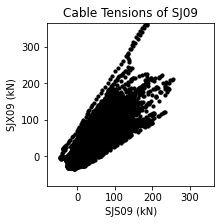

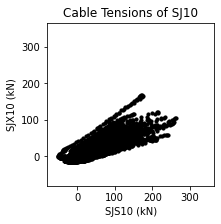

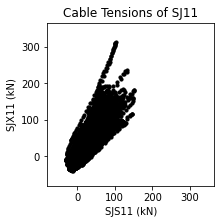

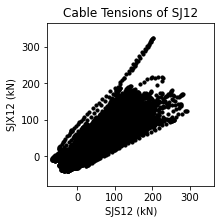

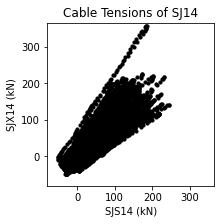

In [7]:
for cable_number in cable_numbers:
    scatter_up_down_cables(tension_df, cable_number, end=length, figsize=(3, 3), fontsize=10)

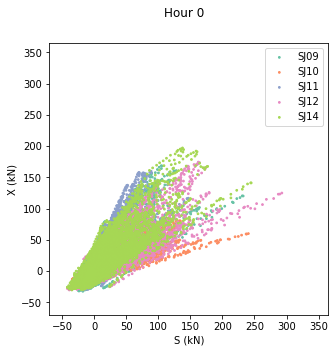

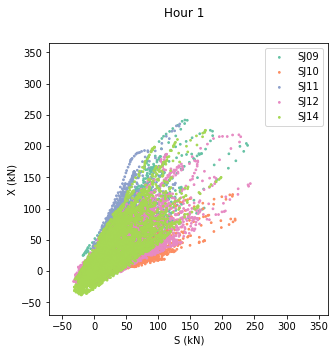

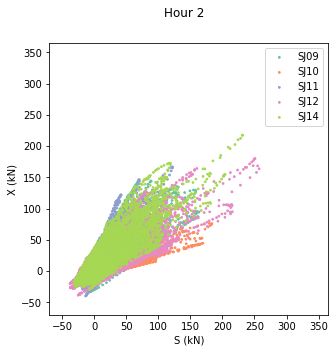

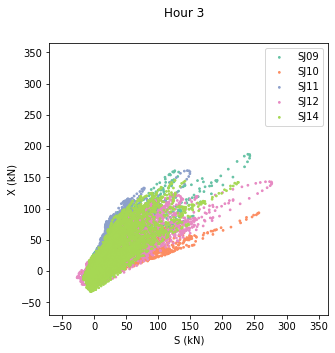

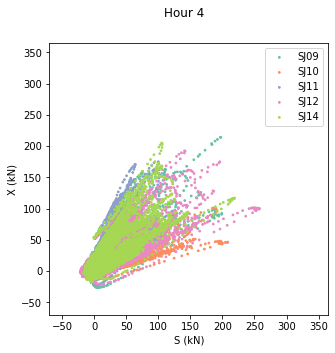

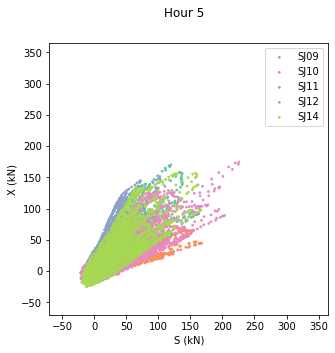

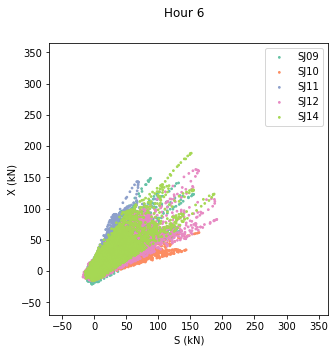

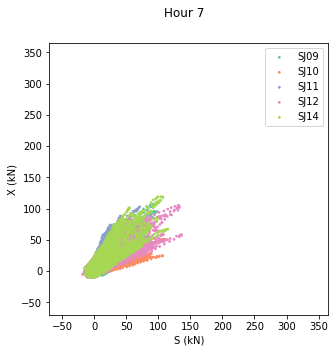

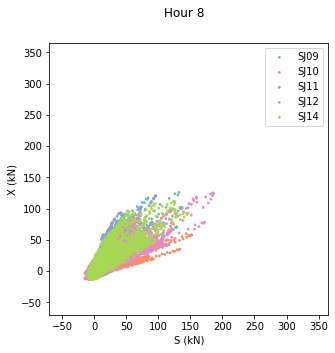

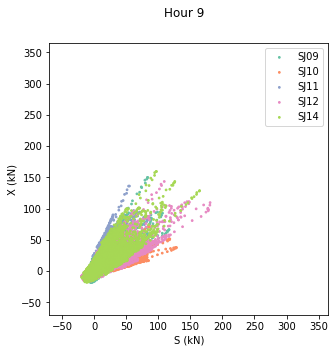

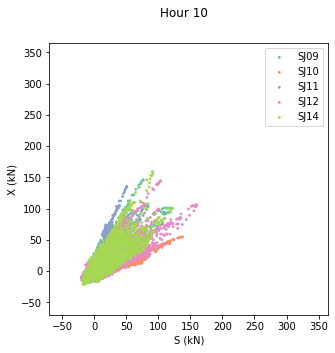

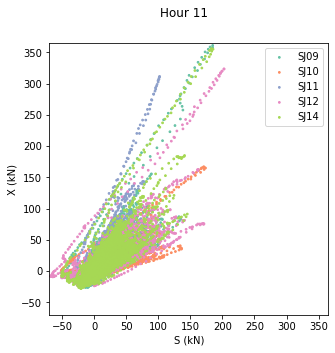

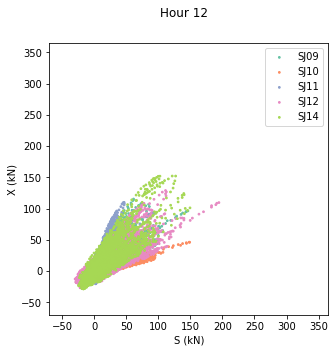

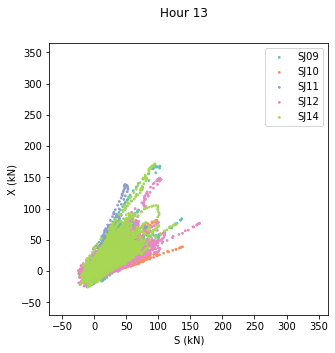

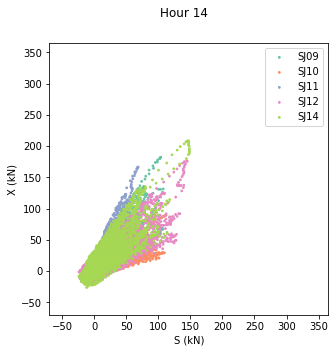

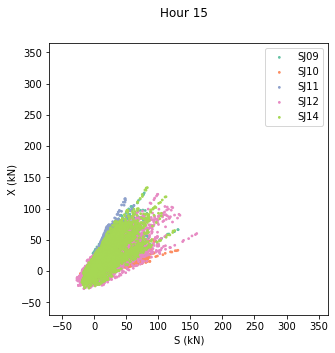

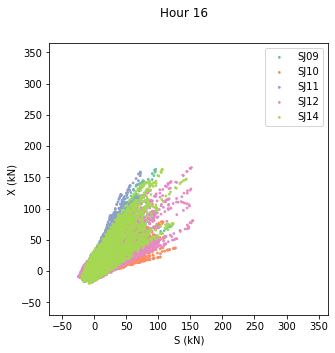

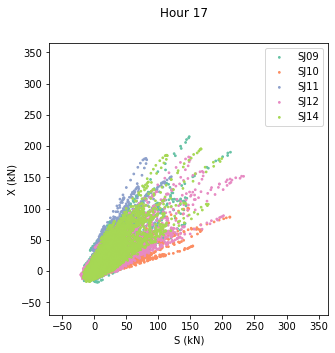

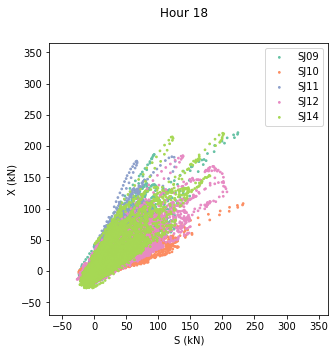

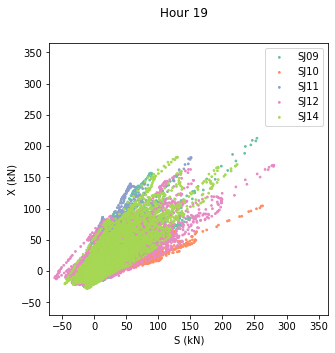

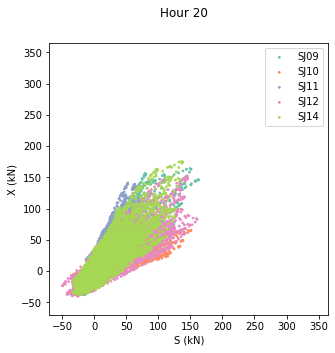

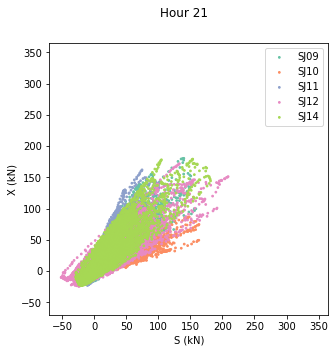

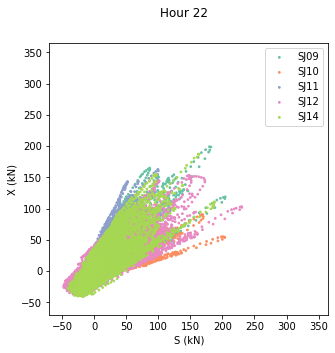

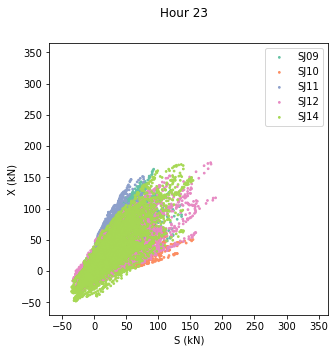

In [10]:
for i in range(24):
    start = (7200 * i) - 90
    end = start + 7200
    if i == 0:
        start += 90
        end -= 90
    if i == 23:
        end -= 90
    scatter_up_down(tension_df, title=f'Hour {i}', start=start, end=end, figsize=(5, 5))